PROYECTO INTEGRADO

Paso 1. Abre el archivo de datos y estudia la información general 

In [152]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
from scipy.stats import ttest_ind
from scipy.stats import levene

In [70]:
games= pd.read_csv('games.csv')

In [71]:
# mostrar los datos del dataframe

display(games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [72]:
# mostrar los datos del dataframe
#
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# mostrar los datos del dataframe
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Paso 2. Prepara los datos

Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [73]:
# Reemplaza los nombres de las columnas (ponlos en minúsculas).

games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Convierte los datos en los tipos necesarios.

Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

La columna year_of_release es de tipo float. Se debe cambiar a tipo integer ya que los años siempre se trabajan como enteros y es más fácil procesar los datos. Antes se deben eliminar los valores ausentes por el bajo porcentaje que hay de ellos. esto no afecta  analisis. tambien al eliminar los ausentes si puedo hacer el cambio de float a integer sin errores.

la columna 'user_score' es de tipo object y los valores son de tipo string se debe cambiar a float para facilitar el procesamiento de la data, pero antes se deben remplazar los valores 'tbd' por nan, para asi  poder realizar el cambio a float.



In [74]:
# revisar valores unicos year_of_release
games.year_of_release.unique()


array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [267]:
# Eliminar valores ausentes de year_of_release

games = games.dropna(subset=['year_of_release'])

In [76]:
# comprobar eliminación de nan

games.year_of_release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [77]:
# convertir year_of_release de float a int

games['year_of_release']= games['year_of_release'].astype(int)

In [78]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


Valores Ausentes

* Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
* ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
* Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

Para las columnas critic_score, user_score y rating, se mantienen los valores ausentes ya que representan aproximadamente el 40% de los datos. Eliminarlos podría llevar a un análisis incorrecto. Por otro lado, se eliminan los valores ausentes de las columnas name y genre, ya que son solo dos y su eliminación no afecta significativamente el análisis del dataset.

Mi hipótesis sobre la gran cantidad de valores ausentes es que los juegos lanzados en las décadas de los 80 y 90 no cuentan con tanta información debido a que en esa época no se recopilaban datos con la misma exhaustividad que hoy en día.

Los valores 'tbd' se reemplazan por NaN. Este cambio permite convertir la columna user_score al tipo float, facilitando así el procesamiento de los datos.

In [79]:
# Eliminar valores ausentes de las columnas 'name' y  'genre'

games = games.dropna(subset=['name'])

games = games.dropna(subset=['genre'])

In [268]:
# Verificar los valores ausentes eliminados

games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
total_sales           0
dtype: int64

En el gráfico se observa que hay cuatro plataformas con outliers o puntos atípicos. En la mayoría de los casos se recomienda limpiarlos para un mejor manejo de los datos. Sin embargo, no consideré necesario hacerlo, ya que estas cuatro plataformas no son tan relevantes respecto a sus ventas y no se encuentran en el top 10 de plataformas, por lo cual no forman parte del análisis

In [81]:
# Reemplazar los valoles 'tbd' de la columna 'user_score' y  pasar toda la serie de object a float

games['user_score']= games['user_score'].replace('tbd', np.nan)
games['user_score']= games['user_score'].astype(float)
games.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Calculo de las ventas totales

In [82]:
# calculo de las ventas totales

games['total_sales']= games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'] 

In [83]:
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Paso 3. Analiza los datos

1. Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

2.  Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

3. Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

4. Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

5. ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

6.  Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

7.  Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

8.  Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

1. Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [84]:
# Agrupar los juegos por año de lanzamiento 

count_games_release = games.groupby('year_of_release')['name'].count().reset_index()
count_games_release

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


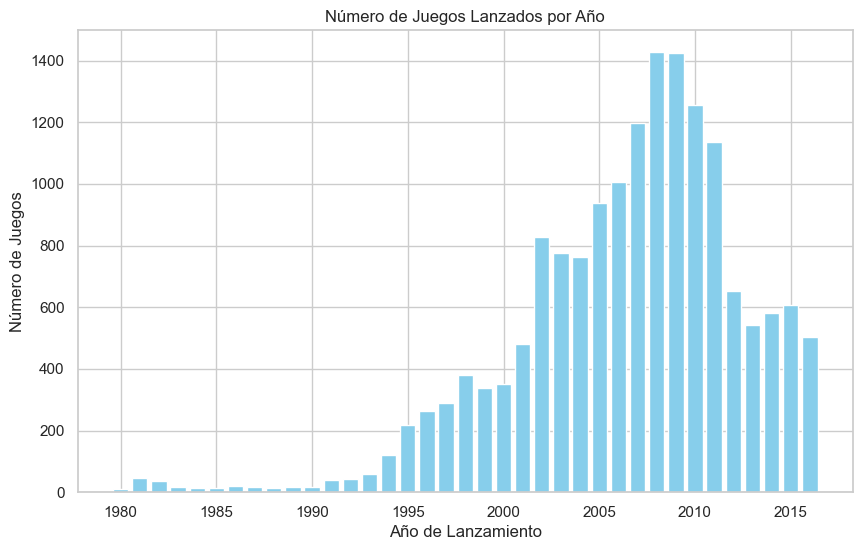

In [85]:
# gráfico

plt.figure(figsize=(10, 6))
plt.bar(count_games_release['year_of_release'], count_games_release['name'], color='skyblue')

# Añadir títulos y etiquetas
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')

# Mejorar la legibilidad del eje x
plt.show()

La variabilidad año tras año puede mostrar cómo cambian los lanzamientos de juegos a lo largo del tiempo. Altas variaciones pueden indicar años atípicos que podrían ser menos significativos. Entre 1980 y 2000, la cantidad de juegos lanzados es mucho menor en comparación con los años posteriores. A partir de 2001, el lanzamiento de juegos aumenta considerablemente, lo cual puede deberse a cambios en la industria y a una mayor accesibilidad tecnológica.

2.  Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [260]:
sales_devices =games.pivot_table(index= 'platform', values= 'total_sales', aggfunc = 'sum').sort_values(by= 'total_sales', ascending = False)
sales_devices.head(10).index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

In [264]:
# organizar por el top de plataformas

top_sales_devices= games[games.platform.isin(sales_devices.head(10).index)]
top_sales_devices

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


In [88]:
# agrupar por el top de plaraformas y ventas totales

agg_top_platform =top_sales_devices.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
agg_top_platform.head(10)
                      

,year_of_release,platform,total_sales
0,1985,DS,0.02
1,1994,PS,6.03
2,1995,PS,35.96
3,1996,PS,94.70
4,1997,PS,136.17
5,1998,PS,169.49
6,1999,PS,144.53
7,2000,GBA,0.07
8,2000,PS,96.37
9,2000,PS2,39.17


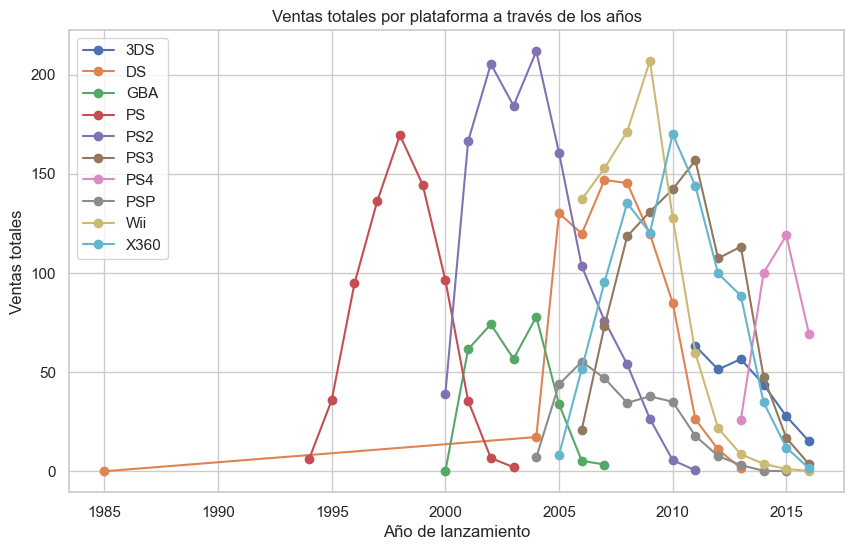

In [89]:
plt.figure(figsize=(10, 6))

for platform, _games in agg_top_platform.groupby('platform'):
    plt.plot(_games['year_of_release'], _games['total_sales'], marker='o', label=platform)

plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales')
plt.title('Ventas totales por plataforma a través de los años')
plt.legend()

plt.grid(True)
plt.show()



In [90]:
# tiempo de vida promedio de las plataformas.

duration_of_device =top_sales_devices.groupby('platform').agg(
    max_year=('year_of_release', 'max'), 
    min_year=('year_of_release', 'min')).reset_index()

duration_of_device['lifetime']= duration_of_device['max_year']- duration_of_device['min_year']
duration_of_device

,platform,max_year,min_year,lifetime
0,3DS,2016,2011,5
1,DS,2013,1985,28
2,GBA,2007,2000,7
3,PS,2003,1994,9
4,PS2,2011,2000,11
5,PS3,2016,2006,10
6,PS4,2016,2013,3
7,PSP,2015,2004,11
8,Wii,2016,2006,10
9,X360,2016,2005,11


Las dos principales plataformas que solían ser más populares y que ahora no tienen ventas son DS, con fecha de lanzamiento en 1985 y su último año de lanzamiento en 2013, y PS, con fecha de lanzamiento en 1994 y su última fecha de lanzamiento en 2007.

In [265]:
# tiempo de vida util de las plataformas
duration_of_device.lifetime.mean()

10.5

El promedio de vida que tardan las plataformas más vendidas desde su lanzamiento hasta que desaparecen del mercado es de 10.5 años aproximadamente.

3. Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Analizando los graficos de los dos puntos anteriores, los datos relevantes se encuentran entre el periodo de 2001 al 2016.

In [92]:
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [93]:
# dataset inicial game filtrado por fechas de lanzamiento entre 2001-2016

filter_games= games[(games['year_of_release'] >= 2001) & (games['year_of_release'] <= 2016)]
filter_games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


In [94]:
filtered_games_release = filter_games.groupby('year_of_release')['name'].count().reset_index()
display(filtered_games_release)

,year_of_release,name
0,2001,482
1,2002,829
2,2003,775
3,2004,762
4,2005,939
5,2006,1006
6,2007,1197
7,2008,1427
8,2009,1426
9,2010,1255


4. Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.


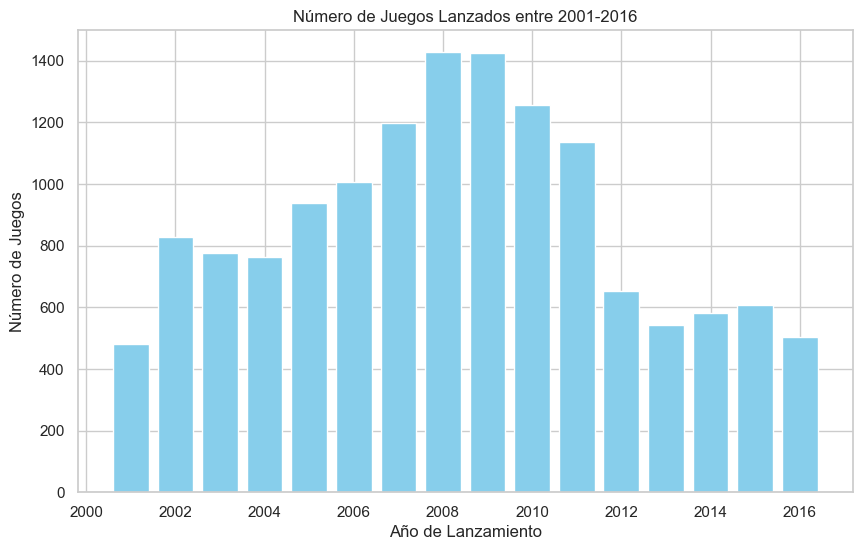

In [95]:

plt.figure(figsize=(10, 6))
plt.bar(filtered_games_release['year_of_release'], filtered_games_release['name'], color='skyblue')

# Añadir títulos y etiquetas
plt.title('Número de Juegos Lanzados entre 2001-2016')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')

plt.show()

5. ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Las primeras 4 plataformas lideres en ventas son:

1. PS2 con 1194.39 millones de dolares 
2. X360	 con 961.24 millones de dolares 
3. PS3	con 931.34 millones de dolares  
4. Wii	con 891.18 millones de dolares 

In [96]:
# Agrupor las plataformas mas vendidas desde 2001-2016

sales_platform = filter_games.groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index()
sales_platform.head(10)

,platform,total_sales
0,PS2,1194.39
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS4,314.14
6,GBA,312.81
7,PSP,289.53
8,3DS,257.81
9,XB,250.58


In [97]:
top_sales_platform= filter_games[filter_games['platform'].isin(sales_platform['platform'].head(10))]
top_sales_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


In [98]:
# ventas totales segun fecha de lanzamiento

sales_platform_time= top_sales_platform.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
sales_platform_time.head(10)
                      

,year_of_release,platform,total_sales
0,2001,GBA,61.53
1,2001,PS2,166.43
2,2001,XB,22.26
3,2002,GBA,74.16
4,2002,PS2,205.38
5,2002,XB,48.01
6,2003,GBA,56.67
7,2003,PS2,184.31
8,2003,XB,55.04
9,2004,DS,17.27


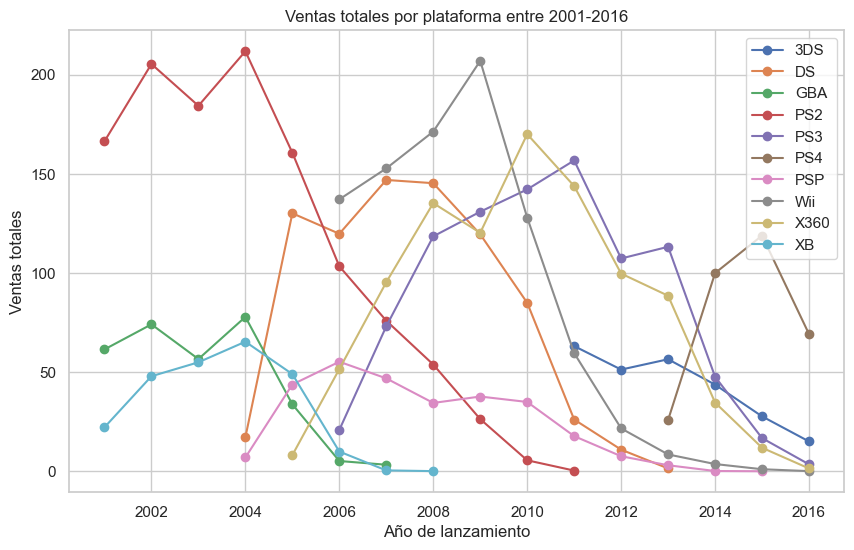

In [99]:
plt.figure(figsize=(10, 6))

for platform, _games in sales_platform_time.groupby('platform'):
    plt.plot(_games['year_of_release'], _games['total_sales'], marker='o', label=platform)

plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales')
plt.title('Ventas totales por plataforma entre 2001-2016')
plt.legend()

plt.grid(True)
plt.show()

A partir del gráfico, se puede concluir que todas las plataformas están decreciendo a lo largo del tiempo; ninguna muestra una tendencia de crecimiento. Respecto a la pregunta sobre cuáles son las plataformas más rentables, se debe considerar que la rentabilidad de un producto se refiere a su capacidad de generar beneficios o ganancias para la empresa que lo produce y vende. Las plataformas que considero más rentables son aquellas que han tenido mayores ventas a lo largo del tiempo: PS2, X360, PS3 y Wii.

6. Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

In [100]:
organize_platform= games.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index().sort_values( by= 'total_sales', ascending=False)
organize_platform

,year_of_release,platform,total_sales
125,2004,PS2,211.81
171,2009,Wii,206.97
113,2002,PS2,205.38
119,2003,PS2,184.31
163,2008,Wii,171.32
...,...,...,...
63,1996,PCFX,0.03
18,1988,PC,0.03
8,1985,DS,0.02
41,1994,3DO,0.02


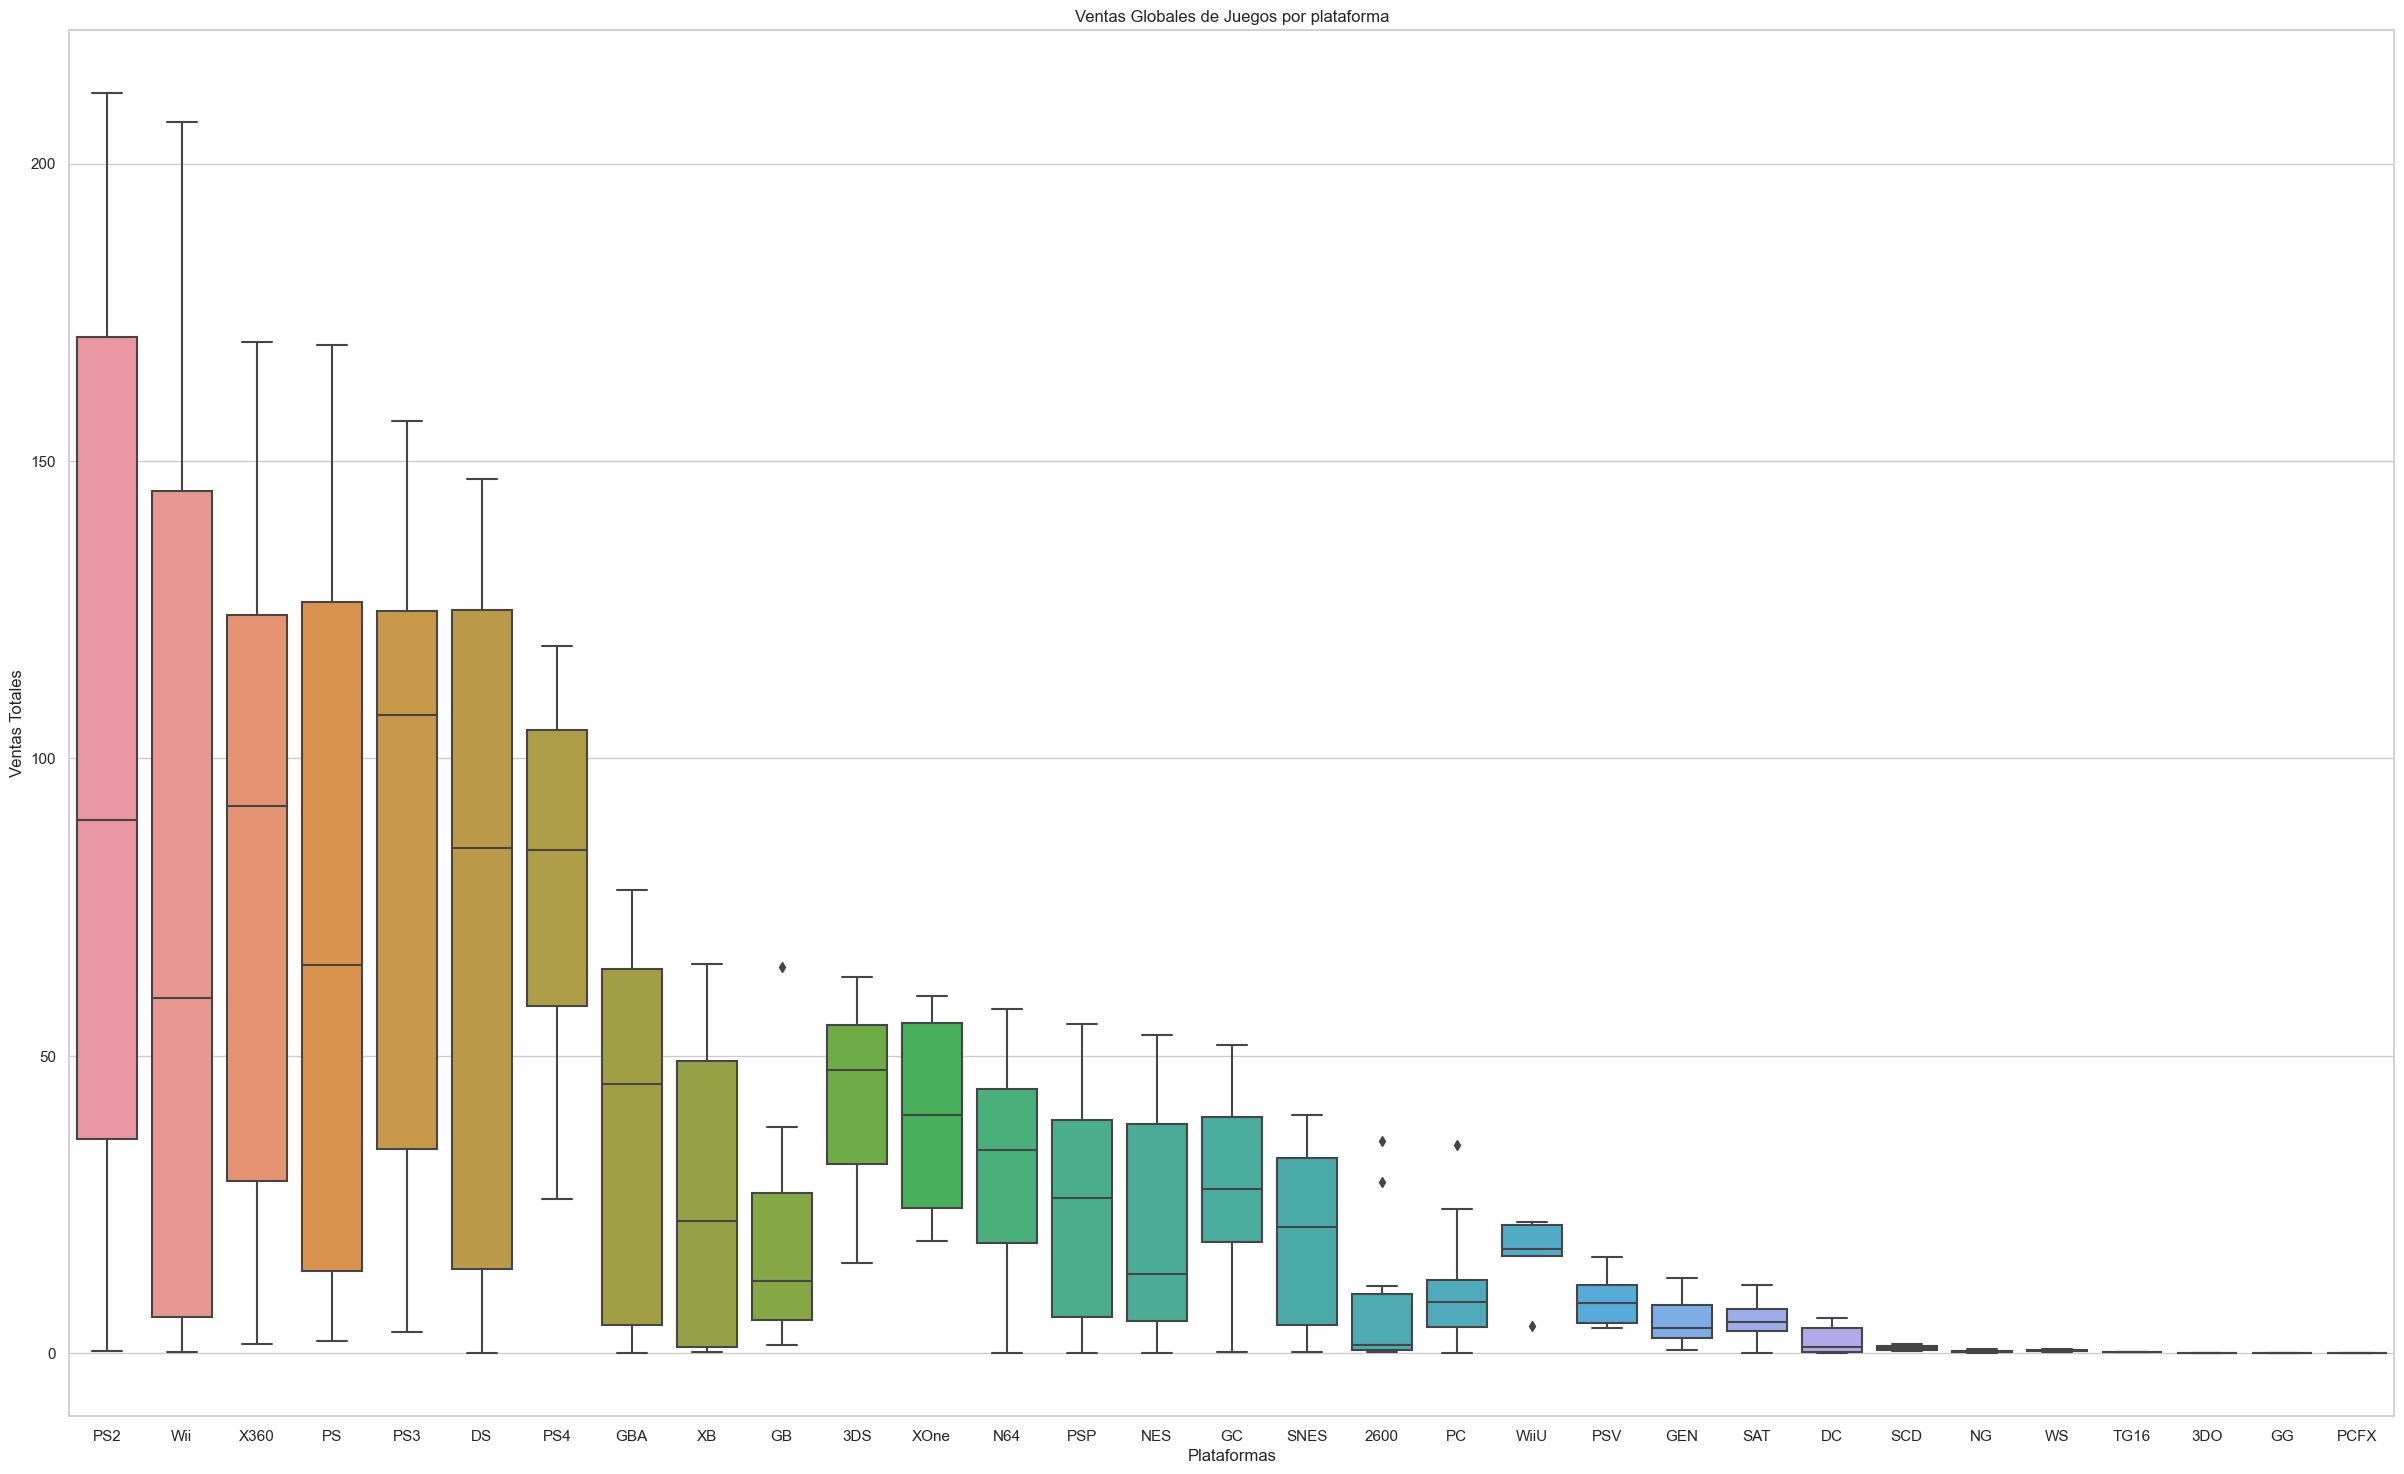

In [101]:
# Diagrama de cajas ventas globales

plt.figure(figsize=(30, 18))
sns.boxplot(data =organize_platform, x='platform', y= 'total_sales')

plt.ylabel('Ventas Totales')
plt.xlabel('Plataformas')
plt.title('Ventas Globales de Juegos por plataforma')

plt.show()

In [266]:
average_sales =games.groupby(['platform']).agg(
    max_sales=('total_sales', 'max'), 
    min_sales=('total_sales', 'min')).reset_index().sort_values( by= 'max_sales', ascending=False)

average_sales

,platform,max_sales,min_sales
26,Wii,82.54,0.01
11,NES,40.24,0.06
5,GB,31.38,0.06
4,DS,29.80,0.01
28,X360,21.82,0.01
17,PS3,21.05,0.00
16,PS2,20.81,0.00
23,SNES,20.62,0.01
6,GBA,15.84,0.01
18,PS4,14.63,0.01


Las diferencias en las ventas globales  de plataformas si son significativas, Plataformas como PS2, WII, X360 son las mas vendidas y muestran una mayor rentabilidad, en cambio plataformas como  3DO, GG, PCFX tiene el mas bajo volumen de ventas.

7. Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
    



In [103]:
# filtrar las columnmas de platform, 'total_sales', 'critic_score', 'user_score'

cols = ['platform', 'total_sales', 'critic_score', 'user_score' ]

score_ps2= games.query("platform == 'PS2'")[cols]

score_ps2.head(20)

,platform,total_sales,critic_score,user_score
17,PS2,20.81,95.0,9.0
24,PS2,16.15,95.0,8.7
28,PS2,14.97,95.0,8.4
38,PS2,13.10,97.0,8.5
48,PS2,11.65,89.0,8.5
84,PS2,8.04,92.0,8.7
102,PS2,7.20,85.0,8.6
113,PS2,6.90,82.0,8.6
114,PS2,6.84,88.0,8.5
132,PS2,6.40,85.0,8.8


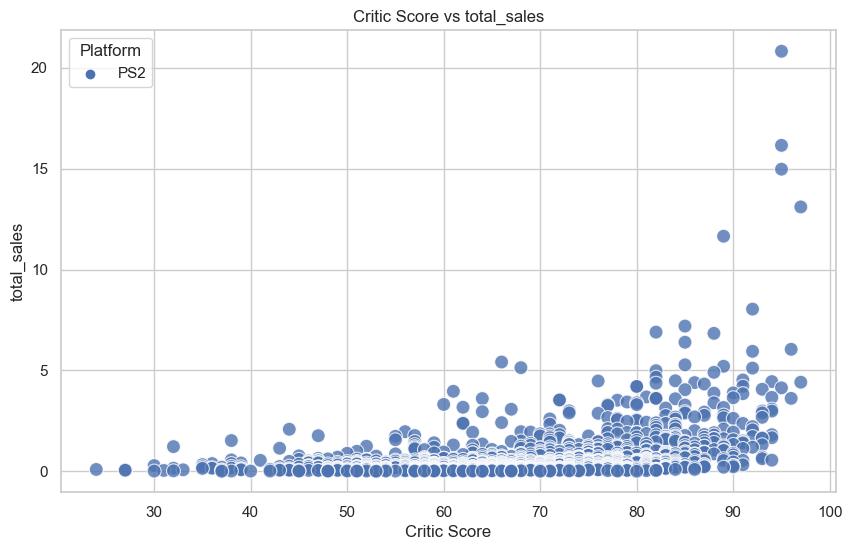

In [104]:
sns.set(style='whitegrid')

# Crear el gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', hue='platform', data=score_ps2, s=100, alpha=0.8)

# Añadir etiquetas y título
plt.xlabel('Critic Score')
plt.ylabel('total_sales')
plt.title('Critic Score vs total_sales')

# Mostrar el gráfico
plt.legend(title='Platform')
plt.show()

In [105]:
# correlacion critic_score con las ventas totales


correlation_critic= score_ps2[['critic_score', 'total_sales']].corr()
correlation_critic


,critic_score,total_sales
critic_score,1.000000,0.392536
total_sales,0.392536,1.000000


In [106]:
print(score_ps2['critic_score'].corr(score_ps2['total_sales']))

0.39253647544509035


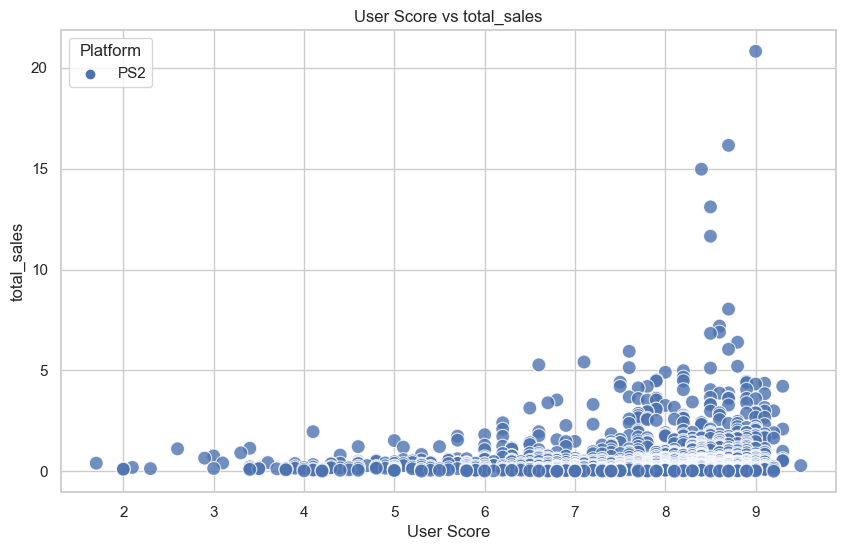

In [107]:
sns.set(style='whitegrid')

# Crear el gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', hue='platform', data=score_ps2, s=100, alpha=0.8)

# Añadir etiquetas y título
plt.xlabel('User Score')
plt.ylabel('total_sales')
plt.title('User Score vs total_sales')

# Mostrar el gráfico
plt.legend(title='Platform')
plt.show()

In [108]:
correlation_user= score_ps2[['user_score', 'total_sales']].corr()
correlation_user

,user_score,total_sales
user_score,1.000000,0.175055
total_sales,0.175055,1.000000


In [109]:
print(score_ps2['user_score'].corr(score_ps2['total_sales']))

0.17505502770383727


"La plataforma seleccionada es PS2, con la cual se analiza cómo afectan las reseñas de los críticos y los usuarios a las ventas totales. A partir de los gráficos de dispersión, se evidencia que la correlación entre las reseñas hechas a la plataforma PS2 y las ventas totales es positiva.

El coeficiente de correlación entre critic_score y total_sales es 0.392536. Este valor está más cerca de 0 que de 1, lo cual sugiere una correlación positiva moderada. El coeficiente de correlación entre user_score y total_sales es 0.175055. Este valor está más cerca de 0, lo cual sugiere una correlación positiva débil."


    
8. Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [254]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [111]:
games.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [112]:
sales_genre = games.groupby('genre')['total_sales'].sum().sort_values(ascending = False).reset_index()
sales_genre

,genre,total_sales
0,Action,1716.52
1,Sports,1309.67
2,Shooter,1041.36
3,Role-Playing,931.08
4,Platform,825.55
5,Misc,790.29
6,Racing,723.49
7,Fighting,442.66
8,Simulation,387.96
9,Puzzle,239.89


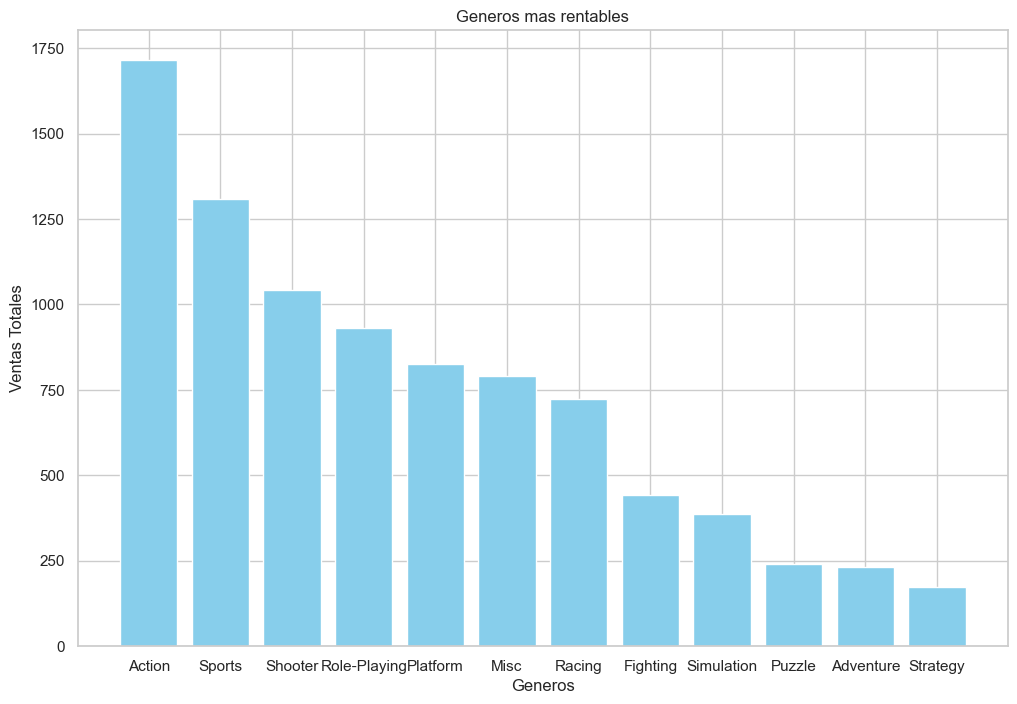

In [113]:
plt.figure(figsize=(12, 8))
plt.bar(sales_genre['genre'], sales_genre['total_sales'], color='skyblue')

# Añadir títulos y etiquetas
plt.title('Generos mas rentables')
plt.xlabel('Generos')
plt.ylabel('Ventas Totales')

plt.show()

¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

El género más rentable es el de Action, con más de 1716 millones de dólares en ventas. Le sigue el género de Sports, y en tercer lugar se encuentra el género de Shooter. Por otro lado, los géneros con las ventas más bajas son Adventure, con 233 millones en ventas, y el género de videojuegos menos vendido es Strategy.

Paso 4. Crear un perfil para el ususario para cada región

Para cada región (NA, UE, JP) determina:

    • Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
    • Los cinco géneros principales. Explica la diferencia.
    • Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.


Perfil de usuario de America (na_sales)

In [114]:
# las 5 principales plataformas de na_sales

platform_na_sales = games.groupby('platform').agg({'na_sales': 'sum'})

# Ordenar por ventas en NA y seleccionar las 5 plataformas más vendidas
top_5_na_sales = platform_na_sales.sort_values(by='na_sales', ascending=False).head(5).reset_index()

print(top_5_na_sales)


  platform  na_sales
0     X360    595.74
1      PS2    572.92
2      Wii    486.87
3      PS3    390.13
4       DS    380.31


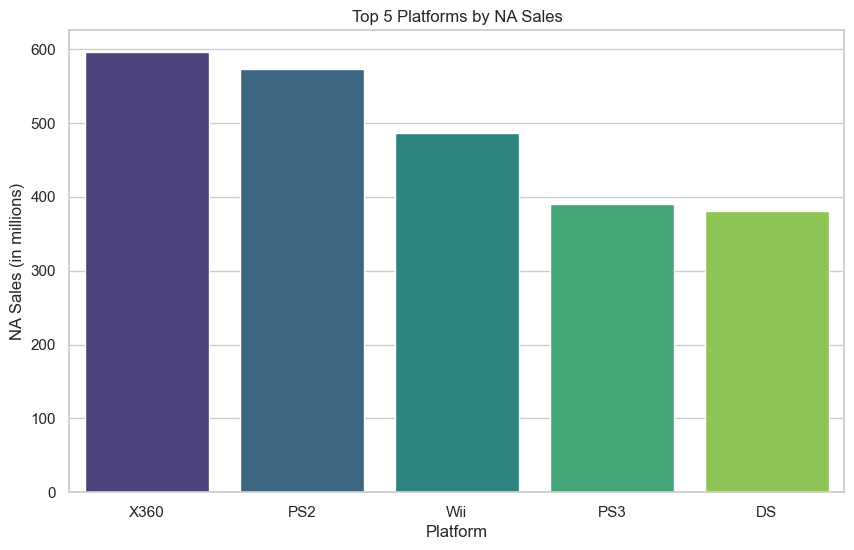

In [115]:
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='na_sales', data=top_5_na_sales, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Platform')
plt.ylabel('NA Sales (in millions)')
plt.title('Top 5 Platforms by NA Sales')

# Mostrar el gráfico
plt.show()

In [116]:
# las 5 principales generos de na_sales

genres_na_sales = games.groupby('genre').agg({'na_sales': 'sum'})

# Ordenar por ventas en NA y seleccionar las 5 plataformas más vendidas
top_5_genre_na_sales = genres_na_sales.sort_values(by='na_sales', ascending=False).head(5).reset_index()

print(top_5_genre_na_sales)

      genre  na_sales
0    Action    863.17
1    Sports    671.20
2   Shooter    584.83
3  Platform    444.44
4      Misc    399.57


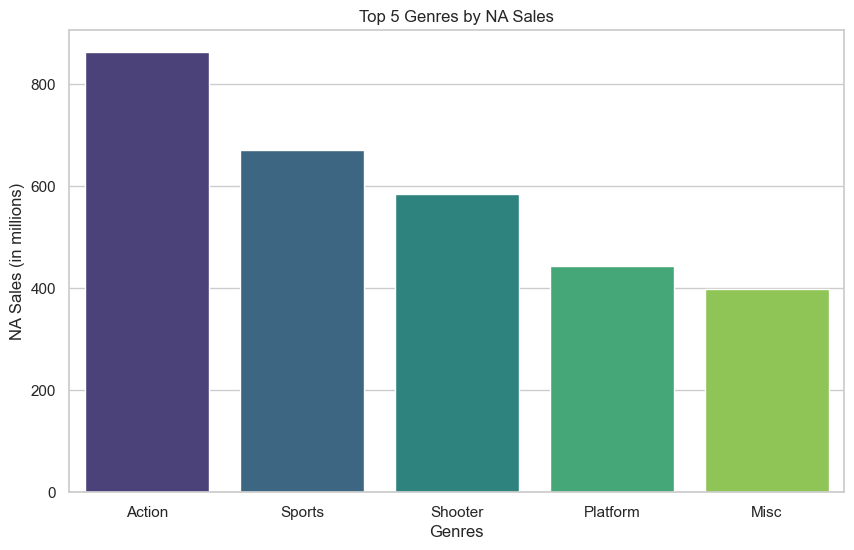

In [117]:
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='na_sales', data=top_5_genre_na_sales, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Genres')
plt.ylabel('NA Sales (in millions)')
plt.title('Top 5 Genres by NA Sales')

# Mostrar el gráfico
plt.show()

In [119]:
rating_na_sales = games.groupby('rating').agg({'na_sales': 'sum'}).reset_index().sort_values(by= 'na_sales', ascending=False)
rating_na_sales

,rating,na_sales
1,E,1274.24
7,T,747.60
5,M,742.89
2,E10+,345.50
4,K-A,2.56
3,EC,1.53
0,AO,1.26
6,RP,0.00


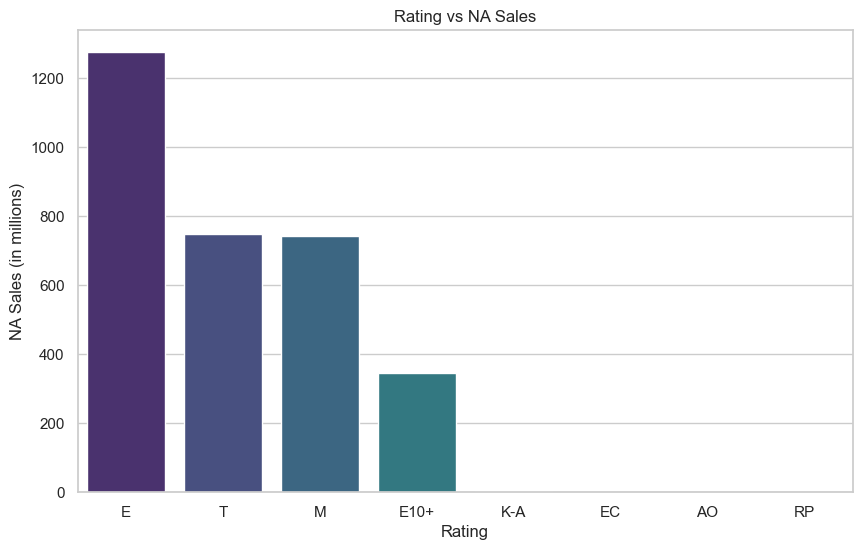

In [120]:
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='na_sales', data= rating_na_sales, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Rating')
plt.ylabel('NA Sales (in millions)')
plt.title('Rating vs NA Sales')

# Mostrar el gráfico
plt.show()

Perfil de usuario de Europa (eu_sales)

In [121]:
# las 5 principales plataformas de eu_sales

platform_eu_sales = games.groupby('platform').agg({'eu_sales': 'sum'})

top_5_eu_sales = platform_eu_sales.sort_values(by='eu_sales', ascending=False).head(5).reset_index()
top_5_eu_sales

,platform,eu_sales
0,PS2,332.63
1,PS3,327.21
2,X360,268.32
3,Wii,258.32
4,PS,212.39


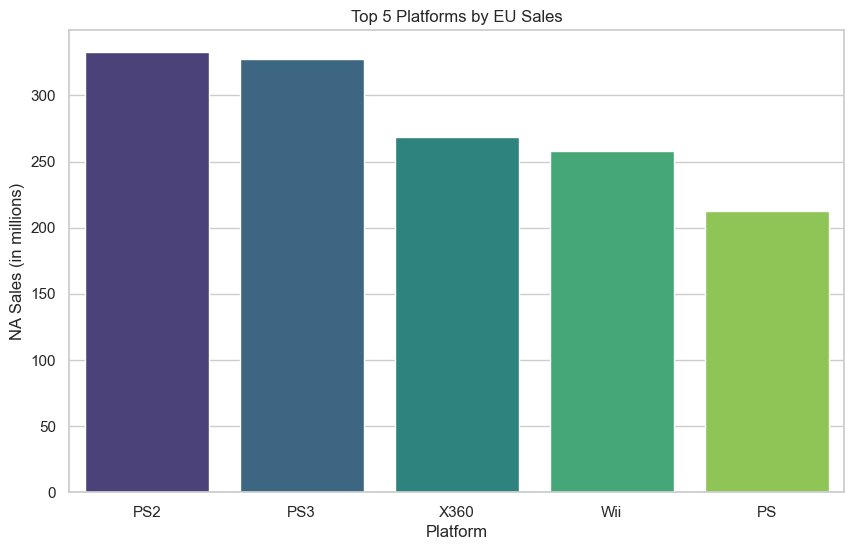

In [122]:
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='eu_sales', data=top_5_eu_sales, palette='viridis')

plt.xlabel('Platform')
plt.ylabel('NA Sales (in millions)')
plt.title('Top 5 Platforms by EU Sales')

plt.show()

In [56]:
# los 5 principales generos de eu_sales

genres_eu_sales = games.groupby('genre').agg({'eu_sales': 'sum'})

top_5_genre_eu_sales = genres_eu_sales.sort_values(by='eu_sales', ascending=False).head(5).reset_index()
top_5_genre_eu_sales

     genre  eu_sales
0   Action    510.99
1   Sports    371.33
2  Shooter    314.52
3   Racing    234.49
4     Misc    210.60


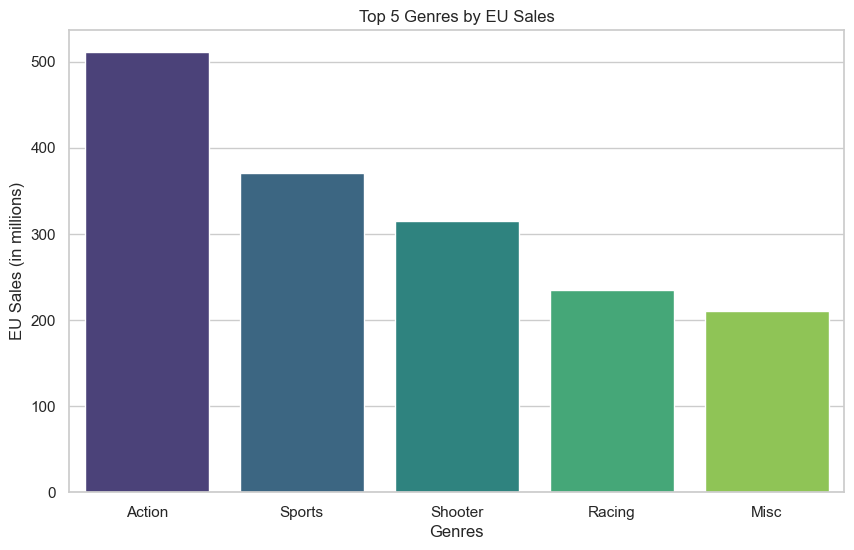

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='eu_sales', data=top_5_genre_eu_sales, palette='viridis')

plt.xlabel('Genres')
plt.ylabel('EU Sales (in millions)')
plt.title('Top 5 Genres by EU Sales')

plt.show()

In [123]:
rating_eu_sales = games.groupby('rating').agg({'eu_sales': 'sum'}).reset_index().sort_values(by= 'eu_sales', ascending=False)
rating_eu_sales

,rating,eu_sales
1,E,703.87
5,M,480.00
7,T,421.79
2,E10+,183.35
0,AO,0.61
4,K-A,0.27
3,EC,0.11
6,RP,0.03


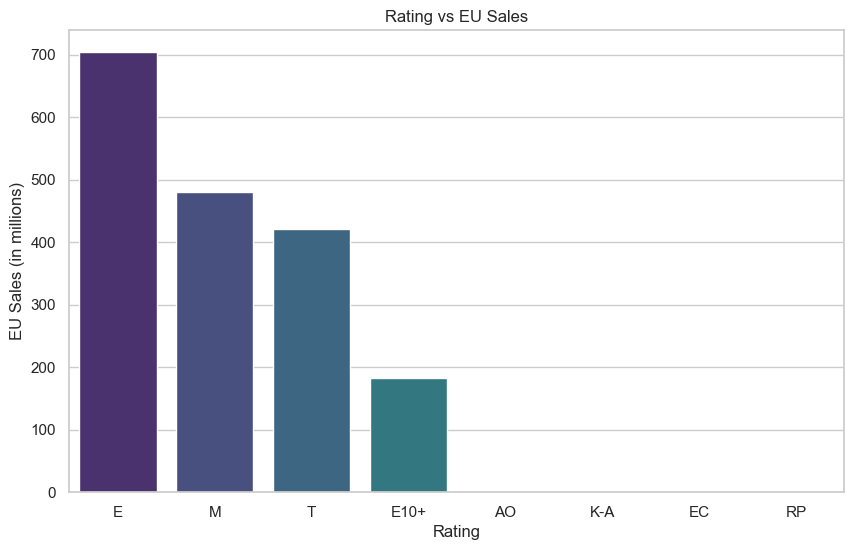

In [124]:
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='eu_sales', data= rating_eu_sales, palette='viridis')

plt.xlabel('Rating')
plt.ylabel('EU Sales (in millions)')
plt.title('Rating vs EU Sales')

plt.show()

Perfil de usuario de Japón (jp_sales)

In [125]:
# las 5 principales plataformas de eu_sales

platform_jp_sales = games.groupby('platform').agg({'jp_sales': 'sum'})

top_5_jp_sales = platform_jp_sales.sort_values(by='jp_sales', ascending=False).head(5).reset_index()
top_5_jp_sales

,platform,jp_sales
0,DS,175.02
1,PS,139.78
2,PS2,137.54
3,SNES,116.55
4,3DS,100.62


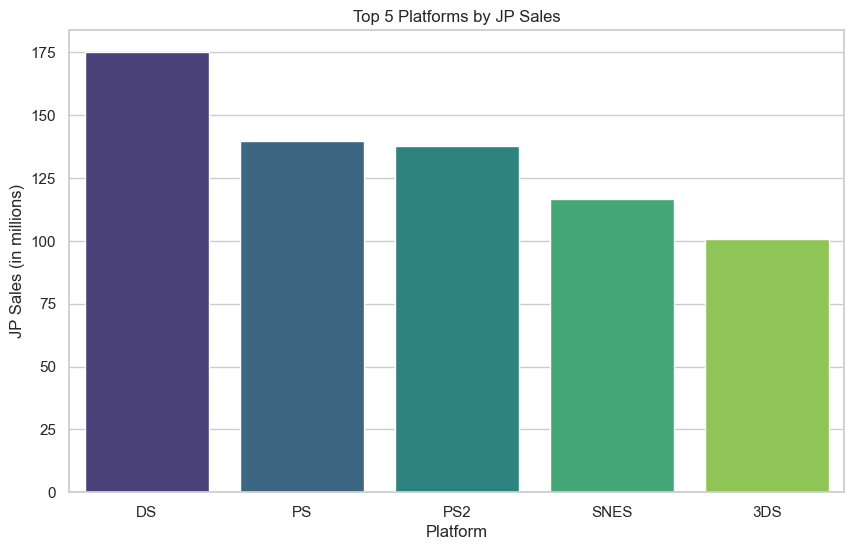

In [126]:
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='jp_sales', data=top_5_jp_sales, palette='viridis')

plt.xlabel('Platform')
plt.ylabel('JP Sales (in millions)')
plt.title('Top 5 Platforms by JP Sales')

plt.show()

In [127]:
# los 5 principales generos de eu_sales

genres_jp_sales = games.groupby('genre').agg({'jp_sales': 'sum'})

top_5_genre_jp_sales = genres_jp_sales.sort_values(by='jp_sales', ascending=False).head(5).reset_index()
top_5_genre_jp_sales

,genre,jp_sales
0,Role-Playing,353.39
1,Action,160.14
2,Sports,134.93
3,Platform,130.71
4,Misc,107.02


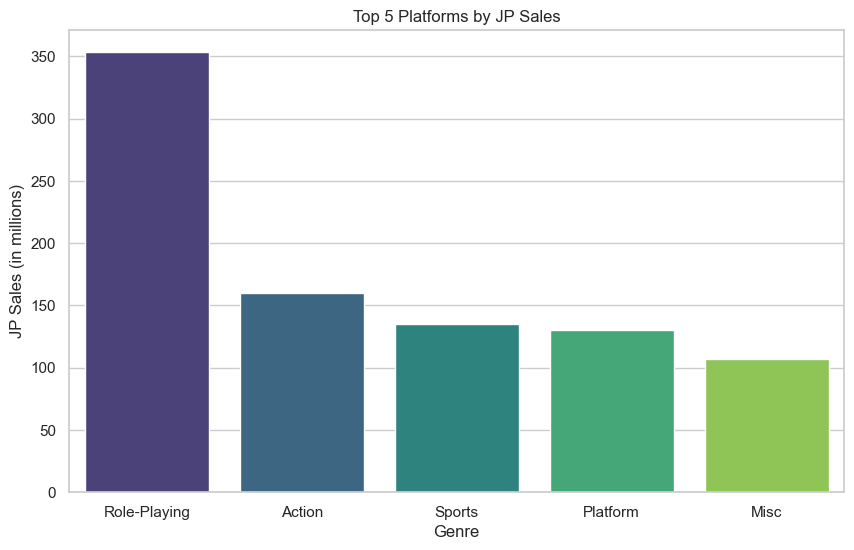

In [128]:
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='jp_sales', data=top_5_genre_jp_sales, palette='viridis')

plt.xlabel('Genre')
plt.ylabel('JP Sales (in millions)')
plt.title('Top 5 Platforms by JP Sales')

plt.show()

In [129]:
rating_jp_sales = games.groupby('rating').agg({'jp_sales': 'sum'}).reset_index().sort_values(by= 'jp_sales', ascending=False)
rating_jp_sales

,rating,jp_sales
1,E,197.96
7,T,150.70
5,M,63.58
2,E10+,40.20
4,K-A,1.46
0,AO,0.00
3,EC,0.00
6,RP,0.00


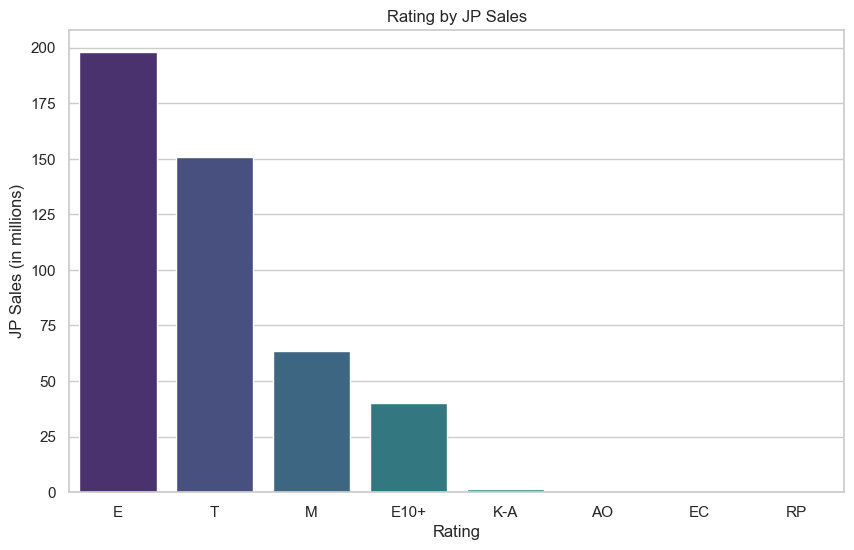

In [130]:
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='jp_sales', data= rating_jp_sales, palette='viridis')

plt.xlabel('Rating')
plt.ylabel('JP Sales (in millions)')
plt.title('Rating by JP Sales')

plt.show()

Para los usuarios de América, las cinco plataformas más vendidas son X360, PS2, Wii, PS3 y DS. Los usuarios de Europa prefieren las plataformas PS2, PS3, X360, Wii y PS. Finalmente, las plataformas más rentables para los usuarios de Japón son DS, PS, PS2, SNES y 3DS. La plataforma PS2 es una de las más vendidas en las tres regiones. Las plataformas Wii, PS3 y X360 son de las más vendidas en América y Europa, pero en Japón no son tan populares y no se encuentran en el top 5 de plataformas.

Analizando los géneros de las tres regiones, los más populares que se encuentran en el top 5 son: Action, Sports y Misc. Entre las diferencias, se observa que los juegos de género Role Playing son los más vendidos en Japón, pero en Europa y América no se encuentran en el top 5. Por su parte, los juegos del género Shooter ocupan el tercer lugar en el ranking de América y Europa. La región que más videojuegos vende es América.

Las clasificaciones de ESRB afectan las ventas en todas las regiones. Los juegos con rating de E (Everyone), apto para todo tipo de edades, son los más vendidos. La clasificación T (Teen), para mayores de 13 años, está en segundo lugar, y la clasificación M (Mature), para mayores de 17 años, tiene la tercera posición.

5. Prueba las siguientes hipótesis:

 • Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

 • Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
 
 • Establece tu mismo el valor de umbral alfa.

Explica:
— Cómo formulaste las hipótesis nula y alternativa.
— Qué criterio utilizaste para probar las hipótesis y por qué.


formular la hipotesis nula y alternativa  

hipotesis 1.  

HO : las calificaciones promedio para las plataformas Xbox one y PC son iguales.

H1:  las calificaciones promedio son distintas.

In [243]:
# Eliminar los nan

score_xone = games[games['platform'] == 'XOne']['user_score'].dropna()
score_pc = games[games['platform'] == 'PC']['user_score'].dropna()

In [251]:
#  Realizar el test de Levene para igualdad de varianzas

levene_stat, levene_p = levene(score_xone, score_pc)

print(f'Test de Levene para user_score: Estadístico={levene_stat}, p-value={levene_p}')

# Dependiendo del p-value del test de Levene, decidir si usar varianzas iguales o desiguales en el t-test
equal_var = levene_p >= 0.05

Test de Levene para user_score: Estadístico=1.1706180824505048, p-value=0.2795532372785057


In [250]:
# Comprobar hipotesis con el ttest

alpha= 0.05

_, p_value = ttest_ind(
    score_xone,
    score_pc,
    equal_var = True   
)
if p_value < alpha:
    print('Rechazamos la hipótesis nula')
    
else:
    print('No rechazamos la hipotesis nula')

Rechazamos la hipótesis nula


Al rechazar la hipotesis nula, se concluye que las calificaciones promedio de los ususarios de la plataforma XOne y PC son difrenets. Dado que el valor de levene_p >= 0.05 el equal_var sera True

hipotesis 2.  

HO : las calificaciones promedio para los video juegos de acción (Action ) y deportes (Sports) son iguales.

H1:  las calificaciones promedio son distintas.

In [232]:
# Eliminar los nan
action_score = games[games['genre'] == 'Action']['user_score'].dropna()
sports_score = games[games['genre'] == 'Sports']['user_score'].dropna()

In [252]:
#  Realizar el test de Levene para igualdad de varianzas

levene_stat, levene_p = levene(action_score, sports_score)

print(f'Test de Levene para user_score: Estadístico={levene_stat}, p-value={levene_p}')

# Dependiendo del p-value del test de Levene, decidir si usar varianzas iguales o desiguales en el t-test
equal_var = levene_p <= 0.05

Test de Levene para user_score: Estadístico=15.429831733332641, p-value=8.763985507235711e-05


In [270]:
# Comprobar hipotesis con el ttest

alpha= 0.05

_, p_value = ttest_ind(
    action_score,
    sports_score,
    equal_var = False
    
)

if p_value < alpha:
    print('Rechazamos la hipótesis nula')
    
else:
    print('No rechazamos la hipotesis nula')

No rechazamos la hipotesis nula


No rechazar la hipotesis nula,las calificaciones de usuario entre los géneros Action y Sports son estadísticamente diferentes, teniendo en cuenta las varianzas desiguales. levene_p <= 0.05 por lo tanto equal_var= False.

Paso 6. Escribe una conclusión general


Al analizar el dataset de videojuegos, se puede concluir que el lanzamiento de plataformas de videojuegos ha aumentado significativamente desde el año 2000 en comparación con los años anteriores. De igual manera, el lanzamiento de juegos de distintos géneros ha aumentado considerablemente después del año 2000. Las plataformas más vendidas a nivel global hasta el año 2016 son PS2 y Wii, y los juegos más vendidos son los de género de acción y deportes. Las ventas totales de plataformas y videojuegos han sido muy fuertes desde el año 2000, pero a partir del 2010 las ventas globales de plataformas han disminuido. Esto puede deberse a la posibilidad de jugar videojuegos de manera online, lo que elimina la necesidad de comprar físicamente una plataforma o un juego.
